##Name: Namita Warang
##Roll no. 22102B2008
##BE CMPN B
Github link:   https://github.com/NamitaWarang/Machine_learning


###PROBLEM STATEMENT NO.1

IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

READING THE DATASET

In [2]:
house = pd.DataFrame(pd.read_csv("/content/housing.csv"))
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Checking the total number of null values columnwise
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

REPLACING NULL VALUES WITH MEAN

In [6]:
#calculating columnwise mean
house['total_bedrooms'].fillna((house['total_bedrooms'].mean()), inplace=True)


In [7]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

ENCODING CATEGORICAL VARIABLES



In [8]:
house['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
house['ocean_proximity'] = house['ocean_proximity'].replace({'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4})
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [10]:
house['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
2    2658
3    2290
4       5
Name: count, dtype: int64

ANALYSING THE RELATIONSHIP BETWEEN TARGET VARIABLE AND OTHER FEATURES

In [11]:
corr_matrix = house.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


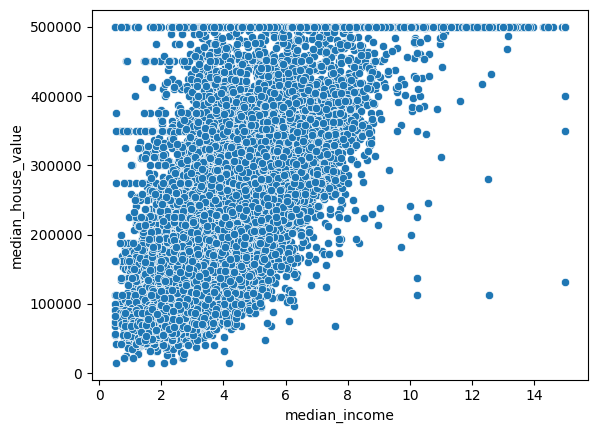

In [12]:
sns.scatterplot(x=house['median_income'], y=house['median_house_value']);

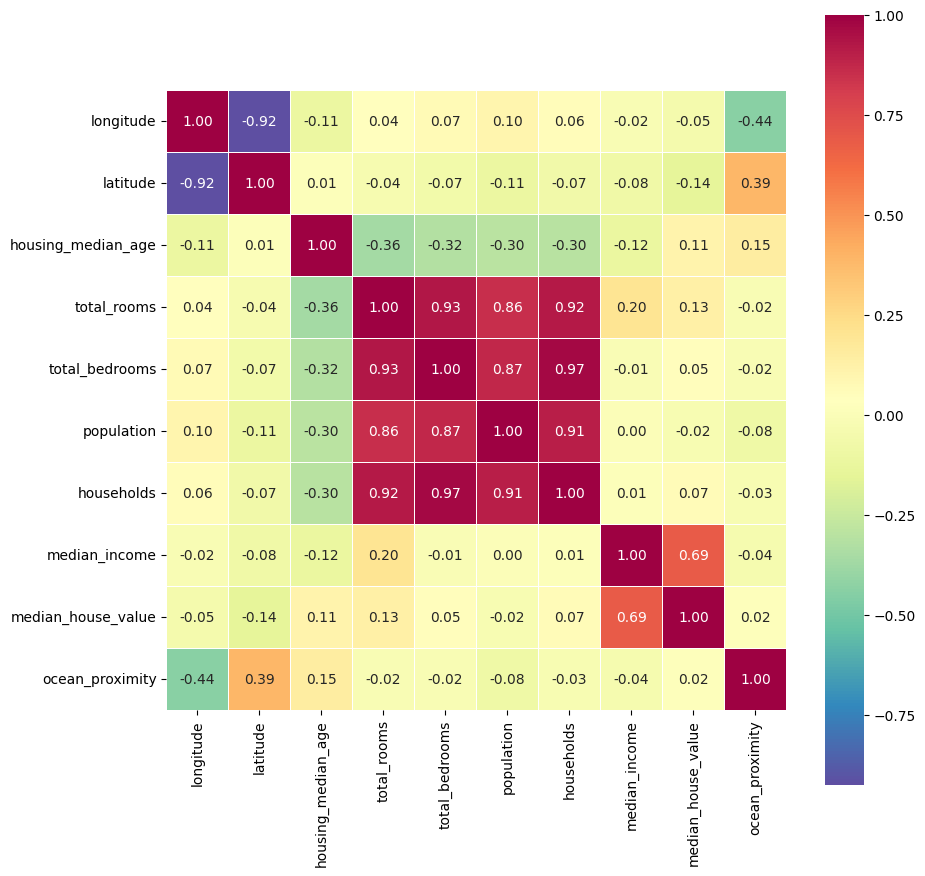

In [13]:
plt.figure(figsize=(10,10))

hm = sns.heatmap(corr_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=house.columns,
                 xticklabels=house.columns,
                 cmap="Spectral_r",
                linewidths=.5)
plt.show()

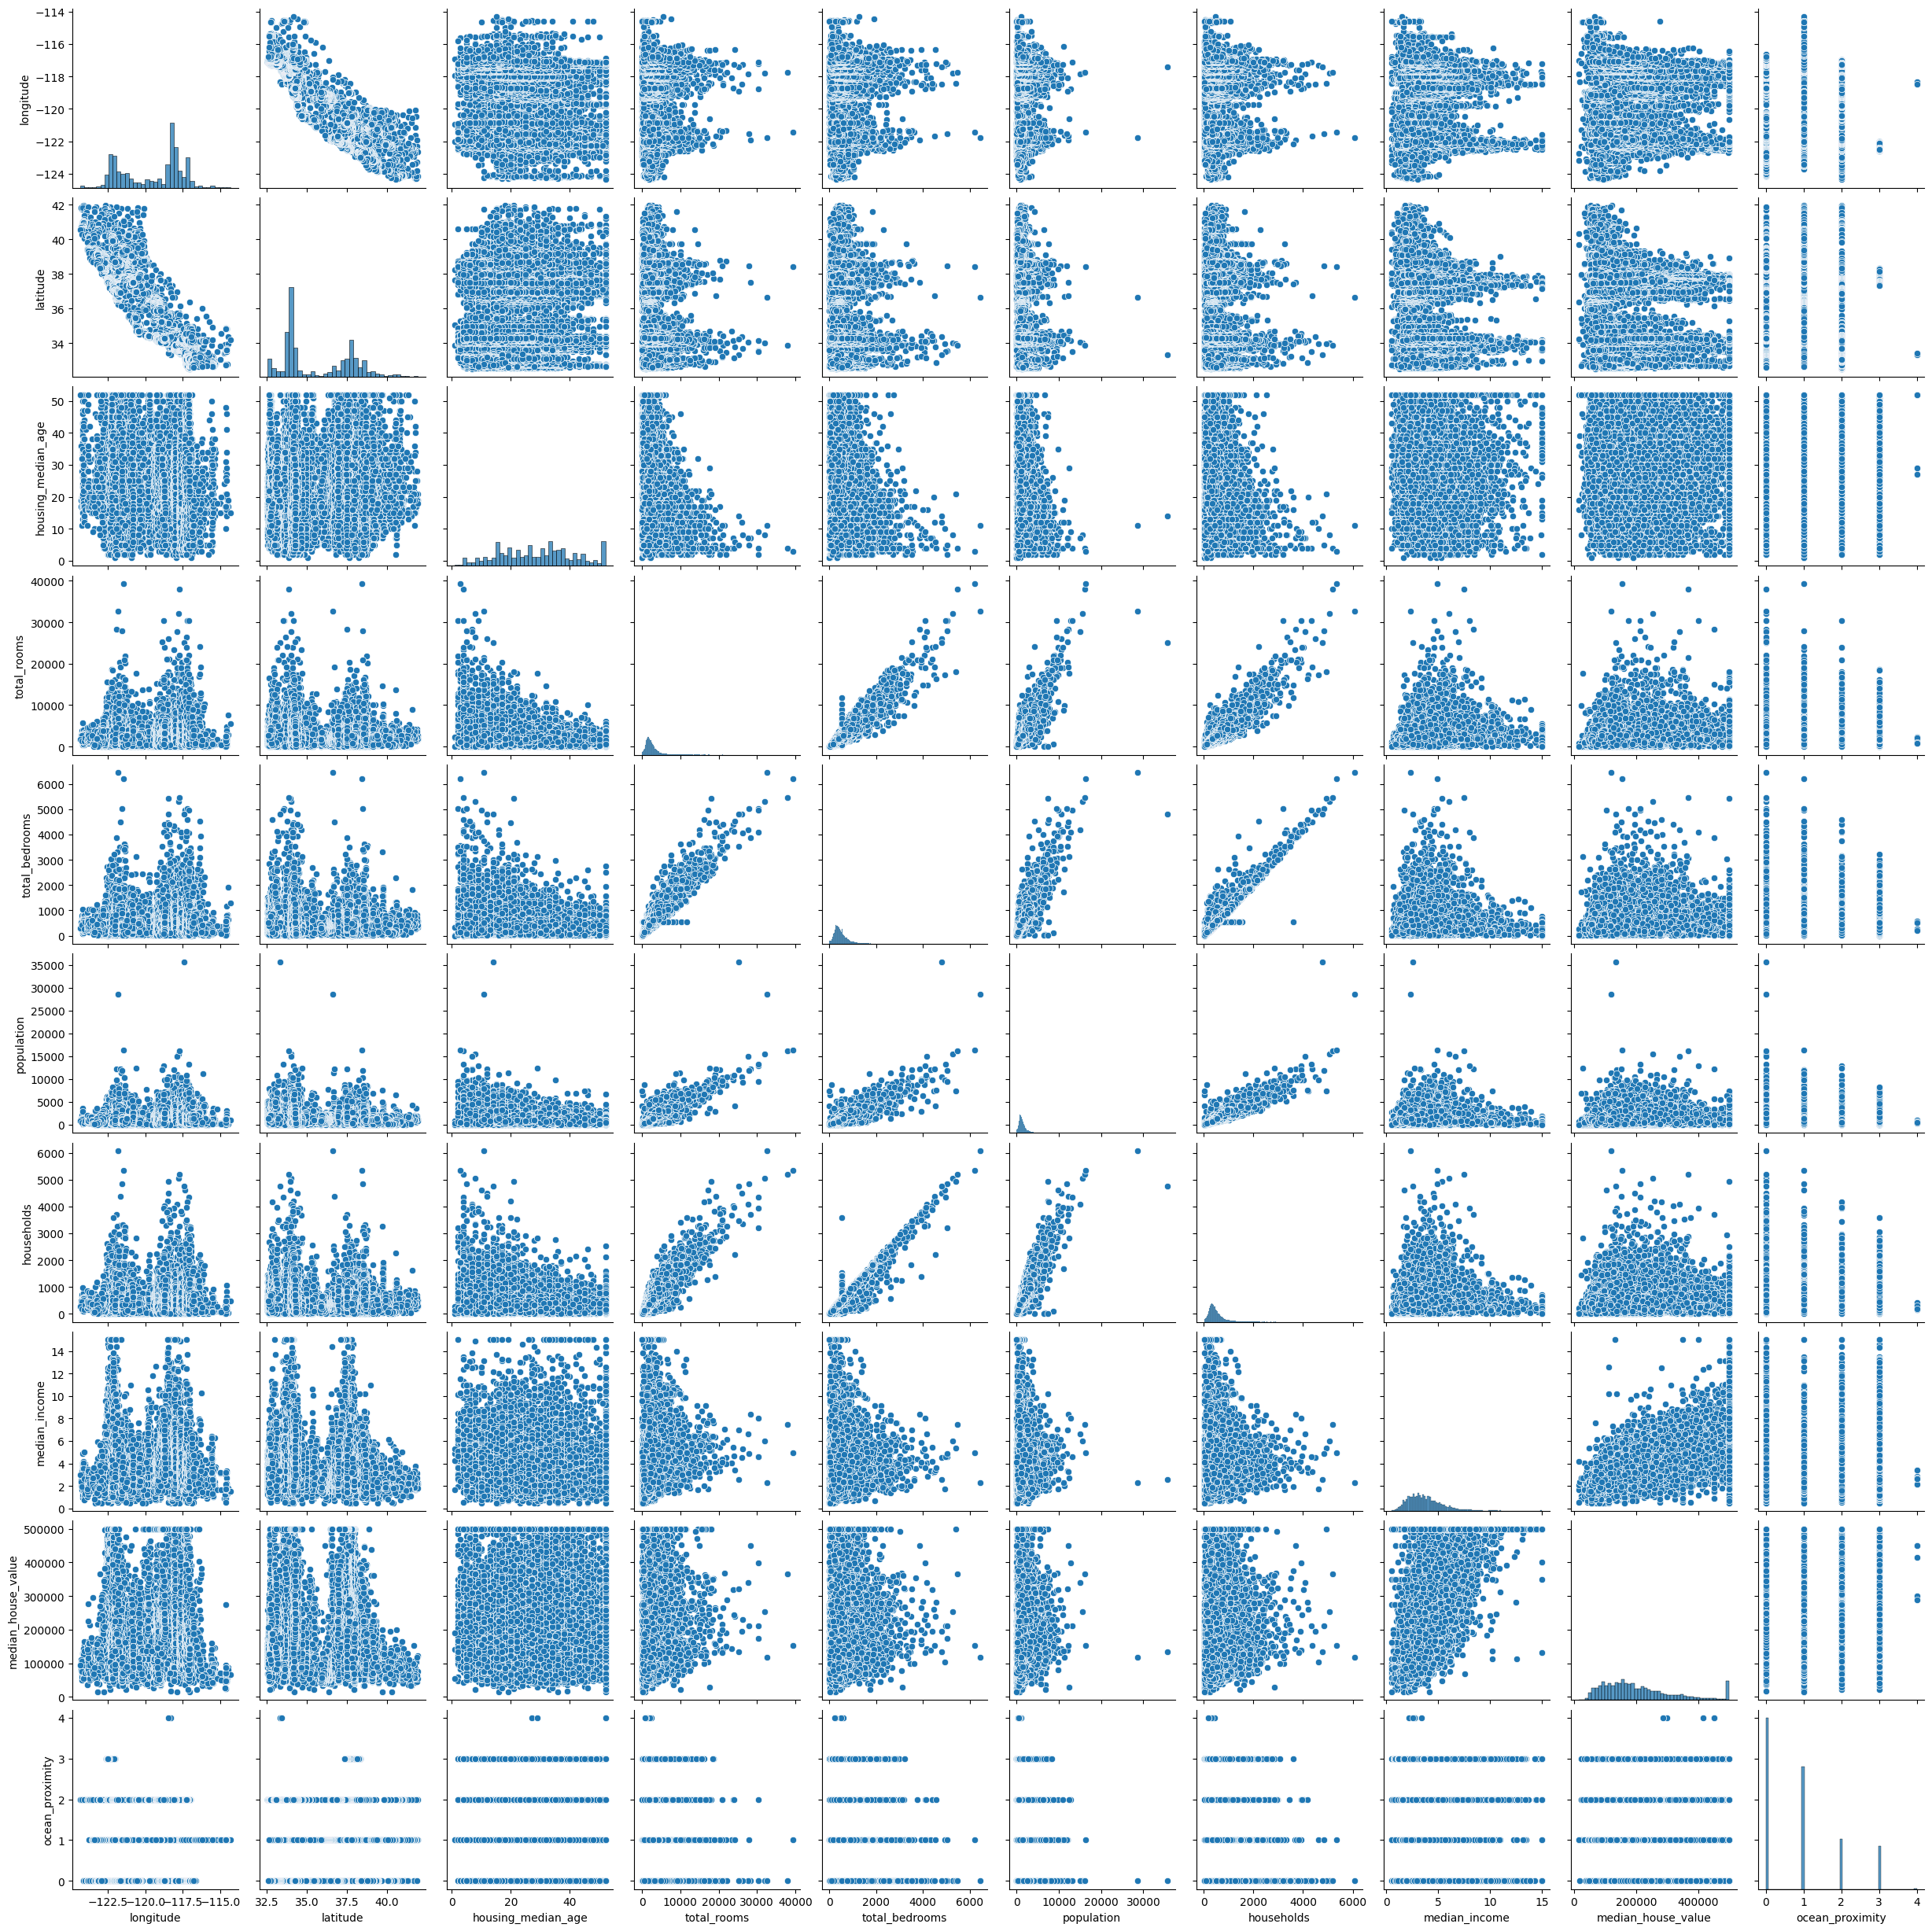

In [14]:
sns.pairplot(house)


OUTLIER ANALYSIS

<Axes: ylabel='median_house_value'>

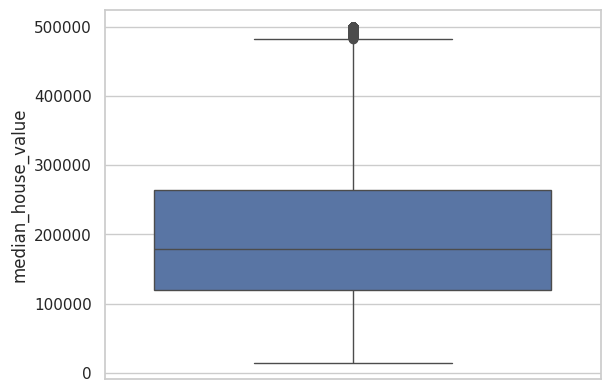

In [15]:
sns.set(style='whitegrid')
sns.boxplot(house['median_house_value'])

SPLITTING THE DATA INTO TRAIN AND TEST

In [16]:
#target variable initalization
target = house['median_house_value']
target.head()

#feature initialization
features = house.drop(['median_house_value'], axis=1)
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.2, random_state = 2)

In [18]:
print(features.shape, X_train.shape, X_test.shape)
print(target.shape, Y_train.shape, Y_test.shape)

(20640, 9) (16512, 9) (4128, 9)
(20640,) (16512,) (4128,)


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, Y_train)

LinearRegression()

In [21]:

# prediction on Test Data
test_prediction = model.predict(X_test)
# prediction on Train data
training_prediction = model.predict(X_train)


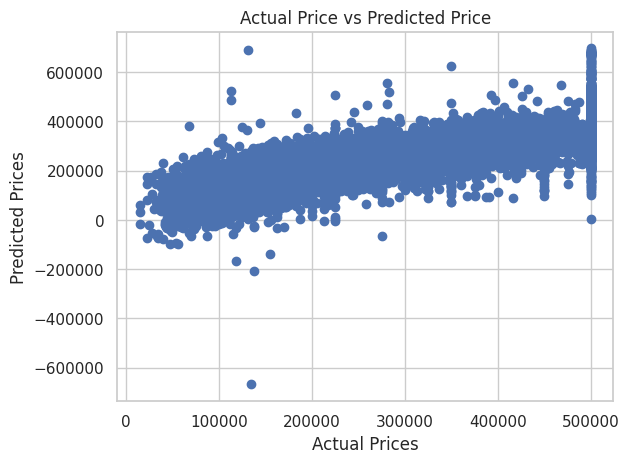

In [22]:
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

Evaluating the model

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE: ",mean_absolute_error(Y_test,test_prediction))
print("MSE: ",mean_squared_error(Y_test,test_prediction))
r2 = r2_score(Y_test,test_prediction)
print("R2 : ",r2)

MAE:  51519.84743939045
MSE:  4974412059.734875
R2 :  0.6307110625843704


Cross validation

In [24]:
train_score =model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)

print('Linear regression score: \n')
print('Train score : ',round(train_score*100),'%')
print('Test score : ',round(test_score*100),'%')


Linear regression score: 

Train score :  64 %
Test score :  63 %
